## Lecture 5 Example. From Simple to Multiple Linear Regression

---

A hospital surgical unit was interested in predicting survival in patients undergoing a
particular type of liver operation. A random selection of 54 patients was available for analysis.
From each patient record, the following information was extracted from the pre-operation
evaluation:

- ``x1`` : Blood clotting score

- ``x2`` : Prognostic index
 
- ``x3`` : Enzyme function test score
 
- ``x4`` : Blood clotting factor (0 or 1)

- ``x5`` : Arsenal FC index

The response variable ``log10y`` was the number of weeks the patients survived after the operation.
The response was transformed by the base 10 logarithm.

Fit the following linear regression models to the patients' record data and determine which model explains the data best:

- ``log10y ~ x1``

- ``log10y ~ x1 + x2``

- ``log10y ~ x1 + x2 + x3``

- ``log10y ~ x1 + x2 + x3 + x4``

- ``log10y ~ x1 + x2 + x3 + x4 + x5``

The data are given in [https://raw.githubusercontent.com/uqglmn/sm/main/liver.csv](https://raw.githubusercontent.com/uqglmn/sm/main/liver.csv)

---

#### Task 1. Read and inspect the data

In [1]:
df = read.csv("https://raw.githubusercontent.com/uqglmn/sm/main/liver.csv")
str(df)

'data.frame':	54 obs. of  6 variables:
 $ log10y: num  2.3 2 2.31 2 2.71 ...
 $ x1    : int  81 66 83 41 115 72 63 81 93 94 ...
 $ x2    : int  62 59 57 73 65 38 46 68 67 76 ...
 $ x3    : num  6.7 5.1 7.4 6.5 7.8 5.8 5.7 3.7 6 3.7 ...
 $ x4    : int  1 1 1 1 1 0 0 1 1 1 ...
 $ x5    : num  1.3 2.97 7.19 2.58 3.27 0.83 -1.87 1.57 3.15 5.21 ...


In [2]:
df$x4 = as.factor(df$x4)
str(df)

'data.frame':	54 obs. of  6 variables:
 $ log10y: num  2.3 2 2.31 2 2.71 ...
 $ x1    : int  81 66 83 41 115 72 63 81 93 94 ...
 $ x2    : int  62 59 57 73 65 38 46 68 67 76 ...
 $ x3    : num  6.7 5.1 7.4 6.5 7.8 5.8 5.7 3.7 6 3.7 ...
 $ x4    : Factor w/ 2 levels "0","1": 2 2 2 2 2 1 1 2 2 2 ...
 $ x5    : num  1.3 2.97 7.19 2.58 3.27 0.83 -1.87 1.57 3.15 5.21 ...


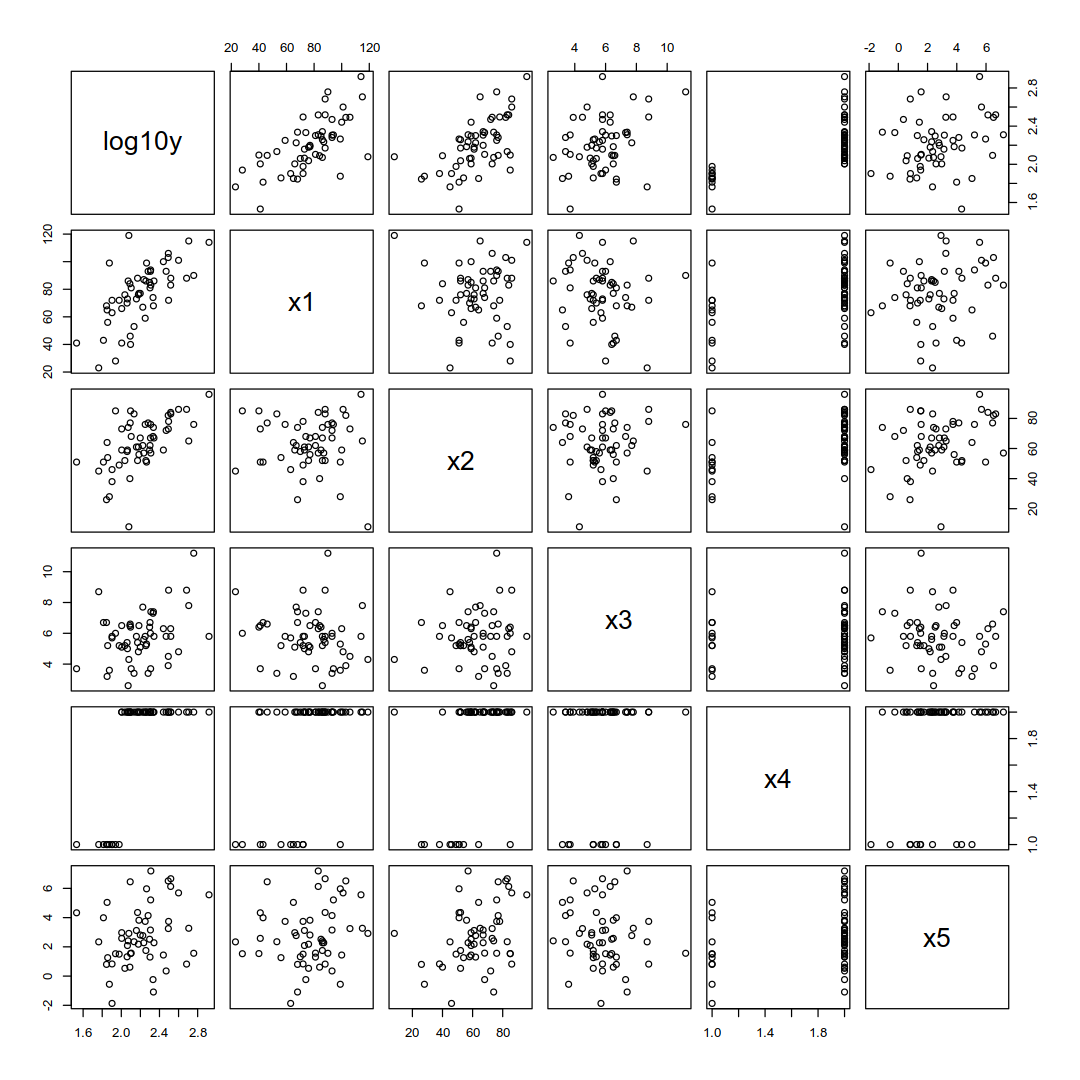

In [3]:
options(repr.plot.width=9, repr.plot.height=9)
pairs(df) # pairs functions plots a matrix of scatterplots

In [4]:
# install.packages("ggplot2")
library(ggplot2)

In [5]:
# install.packages("GGally")
library(GGally)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


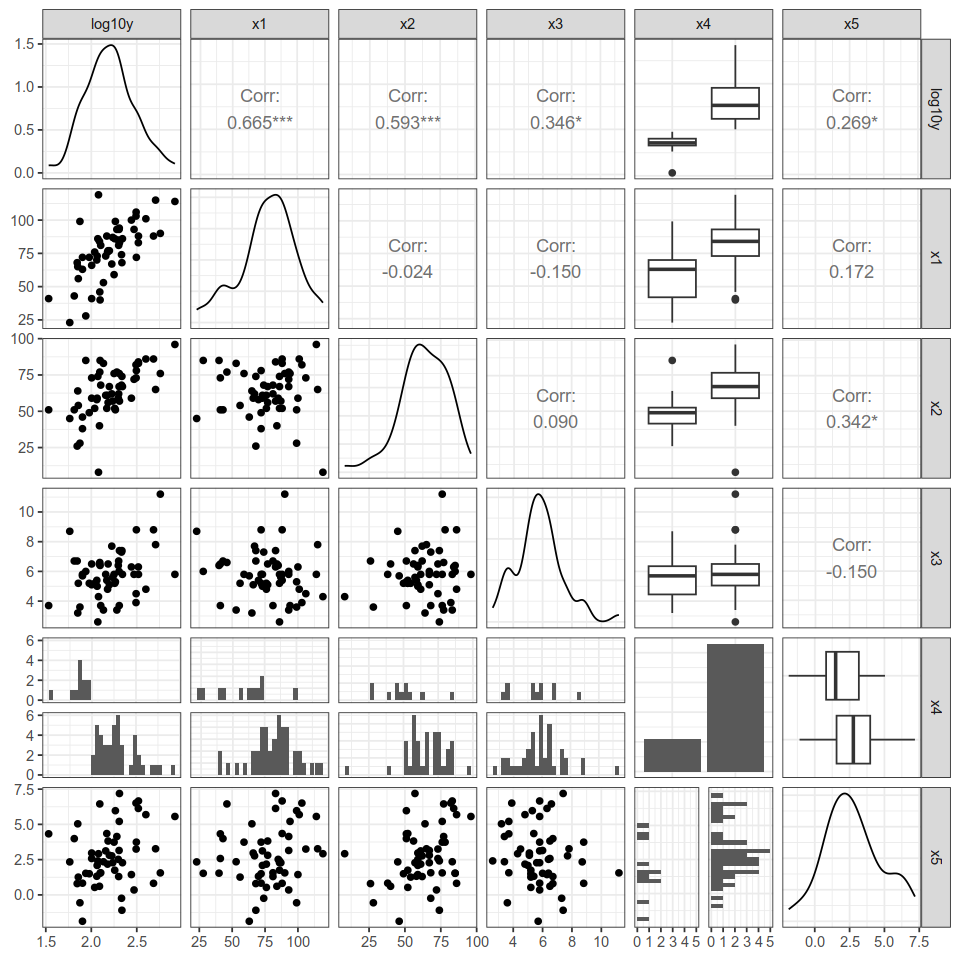

In [6]:
options(repr.plot.width=8, repr.plot.height=8)
ggpairs(df) + theme_bw()

We can see that:

- There is a strong positive correlation between `log10y` and `x1` and between `log10y` and `x2`. 

- There is little correlation between `log10y` and `x3` and between `log10y` and `x4`. 

- Blood clotting factor `x4` is a categorical variable that may be significant.

- Variable `x5` is not a medical record, it is a "fake" Arsenal FC index, added for "educational" purposes. 

- The plots `x3` and `x5` do not differ much, but only `x3` carries some added value to `log10y`.

---

#### Task 2. Build linear regression models

**Model 1:** ``log10y ~ x1``

In [7]:
model1 = lm(log10y~x1, data = df)
summary(model1)
print(anova(model1))


Call:
lm(formula = log10y ~ x1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51859 -0.12908 -0.00951  0.14817  0.44233 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.545465   0.106628  14.494  < 2e-16 ***
x1          0.008568   0.001334   6.423 4.11e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2064 on 52 degrees of freedom
Multiple R-squared:  0.4424,	Adjusted R-squared:  0.4317 
F-statistic: 41.25 on 1 and 52 DF,  p-value: 4.111e-08


Analysis of Variance Table

Response: log10y
          Df Sum Sq Mean Sq F value    Pr(>F)    
x1         1 1.7575  1.7575  41.255 4.111e-08 ***
Residuals 52 2.2153  0.0426                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


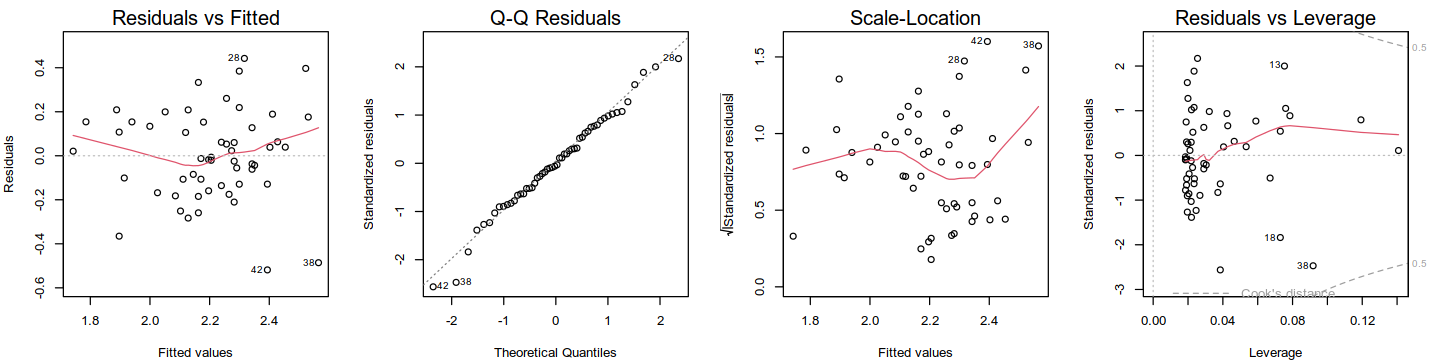

In [8]:
options(repr.plot.width=12, repr.plot.height=3)
par(mfrow=c(1,4), mar=c(4,4,2,2))
plot(model1)

**Model 2**: ``log10y ~ x1 + x2``

In [9]:
model2 = lm(log10y~x1+x2, data=df)
summary(model2)


Call:
lm(formula = log10y ~ x1 + x2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31817 -0.05522  0.00751  0.07153  0.31409 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.9074230  0.0889753   10.20 6.57e-14 ***
x1          0.0087530  0.0007803   11.22 2.22e-15 ***
x2          0.0098633  0.0009812   10.05 1.08e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1207 on 51 degrees of freedom
Multiple R-squared:  0.813,	Adjusted R-squared:  0.8056 
F-statistic: 110.8 on 2 and 51 DF,  p-value: < 2.2e-16


**Model 3**: ``log10y ~ x1 + x2 + x3``

In [10]:
model3 = lm(log10y~x1+x2+x3, data=df)
summary(model3)


Call:
lm(formula = log10y ~ x1 + x2 + x3, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102004 -0.016222 -0.002609  0.011884  0.138314 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.4836209  0.0426287   11.35 1.95e-15 ***
x1          0.0095236  0.0003064   31.08  < 2e-16 ***
x2          0.0092945  0.0003825   24.30  < 2e-16 ***
x3          0.0692251  0.0040779   16.98  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04687 on 50 degrees of freedom
Multiple R-squared:  0.9723,	Adjusted R-squared:  0.9707 
F-statistic:   586 on 3 and 50 DF,  p-value: < 2.2e-16


**Model 4**: ``log10y ~ x1 + x2 + x3 + x4``

In [11]:
model4 = lm(log10y~x1+x2+x3+x4, data=df)
summary(model4)


Call:
lm(formula = log10y ~ x1 + x2 + x3 + x4, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.103774 -0.023060 -0.002432  0.020479  0.123329 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.5227124  0.0438018  11.934 4.15e-16 ***
x1          0.0090502  0.0003521  25.702  < 2e-16 ***
x2          0.0087812  0.0004225  20.782  < 2e-16 ***
x3          0.0676537  0.0039478  17.137  < 2e-16 ***
x41         0.0489384  0.0202532   2.416   0.0194 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04476 on 49 degrees of freedom
Multiple R-squared:  0.9753,	Adjusted R-squared:  0.9733 
F-statistic: 483.5 on 4 and 49 DF,  p-value: < 2.2e-16


**Model 4**: ``log10y ~ x1 + x2 + x3 + x4 + x5``

In [12]:
model5 = lm(log10y~x1+x2+x3+x4+x5, data=df)
summary(model5)


Call:
lm(formula = log10y ~ x1 + x2 + x3 + x4 + x5, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.102722 -0.023022 -0.002434  0.021413  0.124285 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.5225646  0.0442450  11.811 8.29e-16 ***
x1          0.0090423  0.0003579  25.261  < 2e-16 ***
x2          0.0087549  0.0004477  19.556  < 2e-16 ***
x3          0.0677916  0.0040501  16.738  < 2e-16 ***
x41         0.0487454  0.0204793   2.380   0.0213 *  
x5          0.0006424  0.0033154   0.194   0.8472    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0452 on 48 degrees of freedom
Multiple R-squared:  0.9753,	Adjusted R-squared:  0.9727 
F-statistic: 379.2 on 5 and 48 DF,  p-value: < 2.2e-16


**Conclusions:** 

- Variable ``x4`` is less significant than ``x1``, ``x2``, and ``x3``.
- Variable ``x5`` is not significant, i.e. has no added value.

Basic residual analysis:

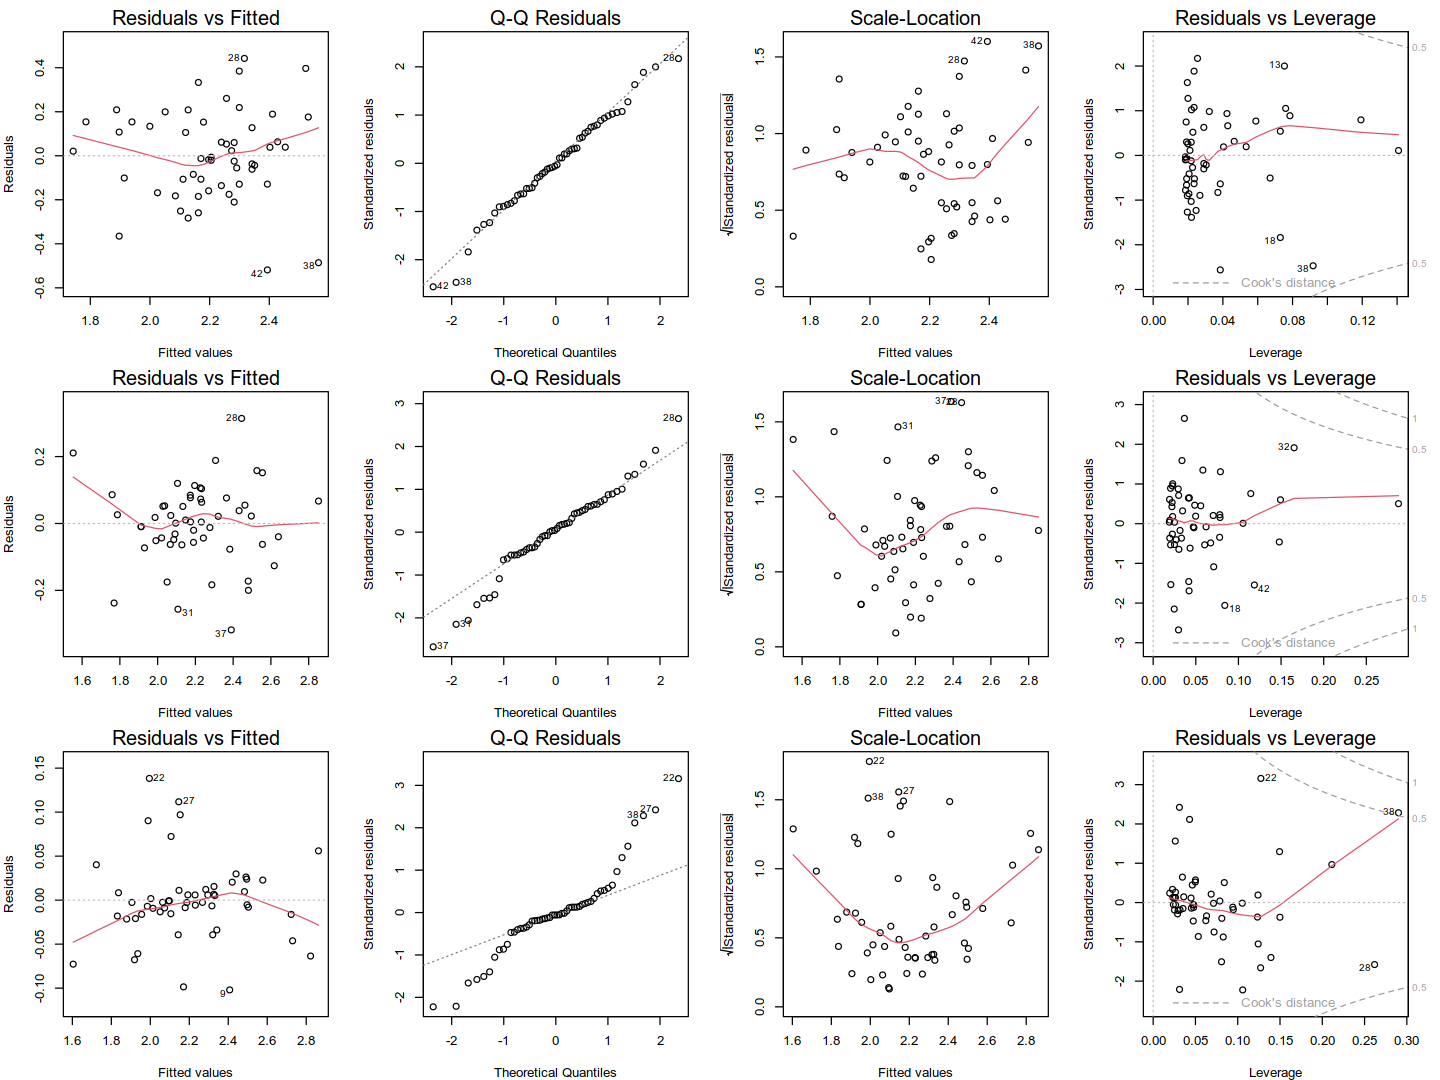

In [13]:
options(repr.plot.width=12, repr.plot.height=9)
par(mfrow=c(3,4), mar=c(4,4,2,2))
plot(model1)
plot(model2)
plot(model3)

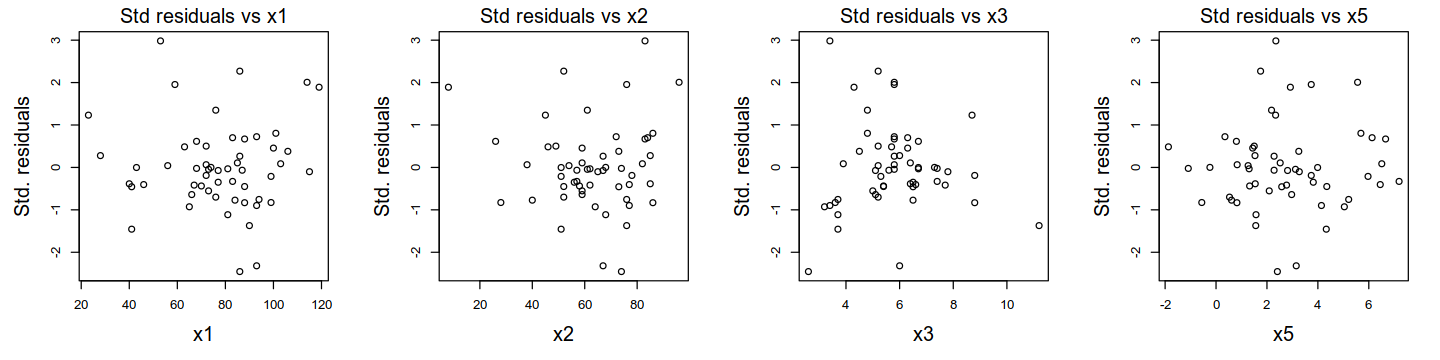

In [14]:
options(repr.plot.width=12, repr.plot.height=3)
par(mfrow=c(1,4), mar=c(5,5,2,2), font.main=1, cex.main=1.5, cex.lab=1.5)
r = rstandard(model4)
plot(r~df$x1, xlab="x1", ylab = "Std. residuals", main="Std residuals vs x1")
plot(r~df$x2, xlab="x2", ylab = "Std. residuals", main="Std residuals vs x2")
plot(r~df$x3, xlab="x3", ylab = "Std. residuals", main="Std residuals vs x3")
plot(r~df$x5, xlab="x5", ylab = "Std. residuals", main="Std residuals vs x5")

---

#### Step 3. Further analysis

Higher-order models

In [15]:
model = lm(log10y~x1*x2*x3, data=df)
summary(model)


Call:
lm(formula = log10y ~ x1 * x2 * x3, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.109868 -0.014626  0.003061  0.014307  0.120169 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.570e-01  3.370e-01  -2.247  0.02951 *  
x1           2.112e-02  3.601e-03   5.865 4.60e-07 ***
x2           2.939e-02  5.765e-03   5.098 6.32e-06 ***
x3           2.494e-01  5.415e-02   4.605 3.26e-05 ***
x1:x2       -1.928e-04  6.241e-05  -3.088  0.00341 ** 
x1:x3       -1.644e-03  6.383e-04  -2.575  0.01331 *  
x2:x3       -2.969e-03  9.492e-04  -3.128  0.00305 ** 
x1:x2:x3     2.808e-05  1.101e-05   2.549  0.01419 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04248 on 46 degrees of freedom
Multiple R-squared:  0.9791,	Adjusted R-squared:  0.9759 
F-statistic: 307.9 on 7 and 46 DF,  p-value: < 2.2e-16


In [16]:
model = lm(log10y~I(1/x1)+I(log(x2))+I(x3^2), data=df)
summary(model)


Call:
lm(formula = log10y ~ I(1/x1) + I(log(x2)) + I(x3^2), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21898 -0.10260 -0.03076  0.06090  0.44453 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.102e+00  2.146e-01   5.134 4.67e-06 ***
I(1/x1)     -2.843e+01  3.153e+00  -9.019 4.61e-12 ***
I(log(x2))   3.222e-01  5.213e-02   6.180 1.15e-07 ***
I(x3^2)      5.509e-03  9.852e-04   5.591 9.38e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1447 on 50 degrees of freedom
Multiple R-squared:  0.7365,	Adjusted R-squared:  0.7207 
F-statistic: 46.59 on 3 and 50 DF,  p-value: 1.636e-14


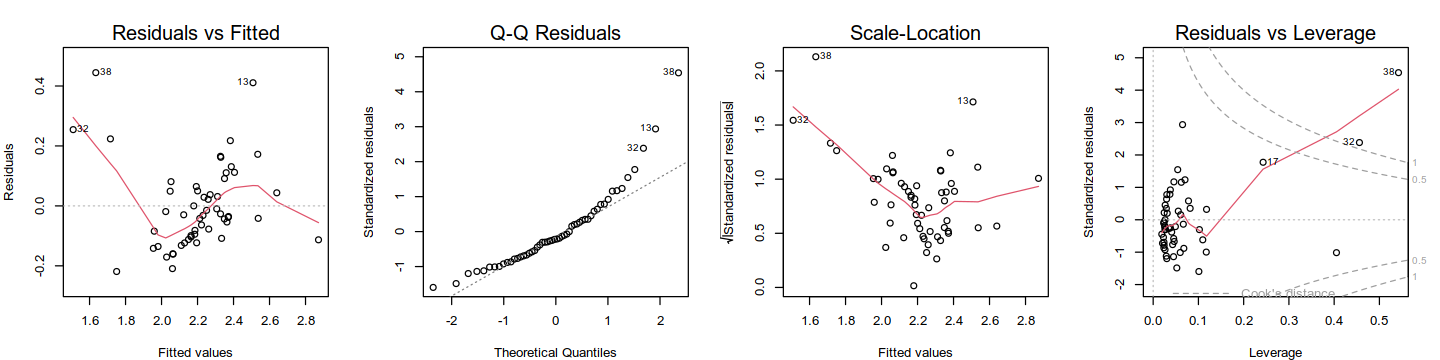

In [17]:
options(repr.plot.width=12, repr.plot.height=3)
par(mfrow = c(1,4), mar=c(4,4,3,2))
plot(model)

In [18]:
m = lm(log10y~x1*x1, data=df)
summary(m)


Call:
lm(formula = log10y ~ x1 * x1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51859 -0.12908 -0.00951  0.14817  0.44233 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.545465   0.106628  14.494  < 2e-16 ***
x1          0.008568   0.001334   6.423 4.11e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2064 on 52 degrees of freedom
Multiple R-squared:  0.4424,	Adjusted R-squared:  0.4317 
F-statistic: 41.25 on 1 and 52 DF,  p-value: 4.111e-08


---